<a href="https://colab.research.google.com/github/jaymonty/NLP_News_App/blob/main/Conll2003_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conll2003 Dataset - NER task - BERT and ELECTRA

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

In [ ]:
from datasets import load_dataset

In [ ]:
#raw_datasets = load_dataset("conll2003")
#raw_datasets

In [ ]:
#raw = pd.DataFrame(raw_datasets["train"])

In [ ]:
dataset = load_dataset('conll2003', split='train+validation+test')
df = pd.DataFrame(dataset)
#df.sample(frac=1).reset_index(drop=True, inplace=True)

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98. Subsequent calls will reuse this data.


In [ ]:
df = df.drop(["id"],axis =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20744 entries, 0 to 20743
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tokens      20744 non-null  object
 1   pos_tags    20744 non-null  object
 2   chunk_tags  20744 non-null  object
 3   ner_tags    20744 non-null  object
dtypes: object(4)
memory usage: 648.4+ KB


In [ ]:
#code to check if there is any row that the lists in the columns have different length (potentially missing values)
for i in range(len(df)):
  a = len(df['tokens'][i])
  if len(df['pos_tags'][i]) != a or len(df['chunk_tags'][i]) != a or len(df['ner_tags'][i]) != a:
    print(a, len(df['pos_tags'][i]), len(df['chunk_tags'][i]), len(df['ner_tags'][i]))

In [ ]:
df.describe(include=['object'])

,tokens,pos_tags,chunk_tags,ner_tags
count,20744,20744,20744,20744
unique,18731,13126,11282,8047
top,"[Scorers, :]","[22, 11]","[11, 12]","[5, 0]"
freq,30,611,1290,955


In [ ]:
df[df['tokens'].duplicated()].count()

tokens        2013
pos_tags      2013
chunk_tags    2013
ner_tags      2013
dtype: int64

In [ ]:
#df[df['tokens'].duplicated() | df['tokens'].duplicated(keep='last')]

In [ ]:
df.drop(df[df['tokens'].duplicated()].index, inplace = True)

In [ ]:
len(df)

18731

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df

,tokens,pos_tags,chunk_tags,ner_tags
0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."
...,...,...,...,...
18726,"[That, is, why, this, is, so, emotional, a, ni...","[12, 42, 46, 12, 42, 30, 16, 12, 21, 15, 28, 6...","[11, 21, 3, 11, 21, 1, 2, 11, 12, 13, 11, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
18727,"["", It, was, the, joy, that, we, all, had, ove...","[0, 28, 38, 12, 21, 15, 28, 12, 38, 15, 12, 21...","[0, 11, 21, 11, 12, 17, 11, 11, 21, 13, 11, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18728,"[Charlton, managed, Ireland, for, 93, matches,...","[22, 38, 22, 15, 11, 24, 6, 15, 43, 21, 28, 38...","[11, 21, 11, 13, 11, 12, 0, 13, 11, 12, 11, 21...","[1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18729,"[He, guided, Ireland, to, two, successive, Wor...","[28, 38, 22, 35, 11, 16, 22, 22, 24, 24, 10, 3...","[11, 21, 11, 21, 11, 12, 12, 12, 12, 12, 0, 13...","[0, 0, 5, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, 0, 7, ..."


In [ ]:
df.describe(include=['object'])

,tokens,pos_tags,chunk_tags,ner_tags
count,18731,18731,18731,18731
unique,18731,13126,11282,8044
top,"[EU, rejects, German, call, to, boycott, Briti...","[22, 11, 11, 11, 11, 11, 11, 11]","[11, 12]","[0, 1, 2, 0, 5, 0, 0]"
freq,1,352,696,580


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18731 entries, 0 to 18730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tokens      18731 non-null  object
 1   pos_tags    18731 non-null  object
 2   chunk_tags  18731 non-null  object
 3   ner_tags    18731 non-null  object
dtypes: object(4)
memory usage: 585.5+ KB


In [ ]:
#@title BERT TRANSFORMER
from transformers import AutoTokenizer

model_checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
inputs = tokenizer(df["tokens"][0], is_split_into_words=True)
inputs.tokens()

['[CLS]',
 'EU',
 'rejects',
 'German',
 'call',
 'to',
 'boycott',
 'British',
 'la',
 '##mb',
 '.',
 '[SEP]']

In [ ]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [ ]:
labels = df["ner_tags"][0]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]


In [ ]:
# convert the dataframe to a Hugging Face Dataset object
dataset = Dataset.from_pandas(df)

# create a DatasetDict object
dataset_dict = DatasetDict({'data': dataset})

# print the DatasetDict object
print(dataset_dict)

DatasetDict({
    data: Dataset({
        features: ['tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 18731
    })
})


In [ ]:
dataset_dict['data']

Dataset({
    features: ['tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 18731
})

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = examples["ner_tags"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [ ]:
tokenized_datasets = dataset_dict.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=dataset_dict["data"].column_names,
)

Map:   0%|          | 0/18731 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    data: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 18731
    })
})

In [ ]:
# Access the encoded sequences as a list of lists of integers representing the token IDs
#input_ids = tokenized_datasets["input_ids"]

# Convert the token IDs back into tokens
#tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in input_ids]

In [ ]:
#tokenized_df = pd.DataFrame({'input_ids': tokenized_datasets['input_ids'], 'token_type_ids': tokenized_datasets['token_type_ids'], 'attention_mask': tokenized_datasets['attention_mask'], 'labels': tokenized_datasets['labels']})
#tokenized_df = pd.DataFrame({'tokens': tokens, 'labels': tokenized_datasets['labels']})

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [ ]:
#example
batch = data_collator([tokenized_datasets["data"][i] for i in range(2)])
batch["labels"]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100, -100]])

In [ ]:
#example
for i in range(2):
    print(tokenized_datasets["data"][i]["labels"])

[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]
[-100, 1, 2, -100]


In [ ]:
batch = data_collator(tokenized_datasets["data"])

In [ ]:
batch['labels']

tensor([[-100,    3,    0,  ..., -100, -100, -100],
        [-100,    1,    2,  ..., -100, -100, -100],
        [-100,    5,    6,  ..., -100, -100, -100],
        ...,
        [-100,    1,    0,  ..., -100, -100, -100],
        [-100,    0,    0,  ..., -100, -100, -100],
        [-100,    0,    0,  ..., -100, -100, -100]])

In [ ]:
#pd.DataFrame({'input_ids': batch['input_ids'], 'token_type_ids': batch['token_type_ids'], 'attention_mask': batch['attention_mask'], 'labels': batch['labels']})
batch_df = pd.DataFrame({'input_ids': batch['input_ids'].tolist(), 'token_type_ids': batch['token_type_ids'].tolist(), 'attention_mask': batch['attention_mask'].tolist(), 'labels': batch['labels'].tolist()})

In [ ]:
batch_df['input_ids'].str.len().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        173
1        173
2        173
3        173
4        173
        ... 
18726    173
18727    173
18728    173
18729    173
18730    173
Name: input_ids, Length: 18731, dtype: int64>

In [ ]:
batch_df['labels'].str.len().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        173
1        173
2        173
3        173
4        173
        ... 
18726    173
18727    173
18728    173
18729    173
18730    173
Name: labels, Length: 18731, dtype: int64>

In [ ]:
batch_df[batch_df['input_ids'].duplicated()].count()

input_ids         5
token_type_ids    5
attention_mask    5
labels            5
dtype: int64

In [ ]:
batch_df.drop(batch_df[batch_df['input_ids'].duplicated()].index, inplace = True)

In [ ]:
# convert the dataframe to a Hugging Face Dataset object
#trans_dataset = Dataset.from_pandas(batch_df)

# create a DatasetDict object
#transformed_dataset = DatasetDict({'data': trans_dataset})

# print the DatasetDict object
#print(transformed_dataset)

In [ ]:
batch_df.describe(include=['object'])

,input_ids,token_type_ids,attention_mask,labels
count,18726,18726,18726,18726
unique,18726,1,99,9757
top,"[101, 7270, 22961, 1528, 1840, 1106, 21423, 14...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[-100, 3, 0, 0, 0, 0, 0, 0, 0, -100, -100, -10..."
freq,1,18726,1063,280


In [ ]:
#batch_df['input_ids'][2583] == batch_df['input_ids'][1171]

In [ ]:
batch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18726 entries, 0 to 18730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   input_ids       18726 non-null  object
 1   token_type_ids  18726 non-null  object
 2   attention_mask  18726 non-null  object
 3   labels          18726 non-null  object
dtypes: object(4)
memory usage: 731.5+ KB


In [ ]:
batch_df

In [ ]:
train_df, test_df = train_test_split(batch_df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)


In [ ]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)
val_df.reset_index(drop=True,inplace=True)

In [ ]:
train_df.describe(include=['object'])

,input_ids,token_type_ids,attention_mask,labels
count,14980,14980,14980,14980
unique,14980,1,96,8013
top,"[101, 1109, 13484, 117, 1152, 2936, 11579, 113...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[-100, 3, 0, 0, 0, 0, 0, 0, 0, -100, -100, -10..."
freq,1,14980,850,226


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   input_ids       14980 non-null  object
 1   token_type_ids  14980 non-null  object
 2   attention_mask  14980 non-null  object
 3   labels          14980 non-null  object
dtypes: object(4)
memory usage: 468.2+ KB


In [ ]:
test_df.describe(include=['object'])

,input_ids,token_type_ids,attention_mask,labels
count,1873,1873,1873,1873
unique,1873,1,70,1261
top,"[101, 121, 119, 8636, 4974, 121, 118, 121, 119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[-100, 3, 0, 0, 0, 0, 0, 0, 0, -100, -100, -10..."
freq,1,1873,111,28


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   input_ids       1873 non-null   object
 1   token_type_ids  1873 non-null   object
 2   attention_mask  1873 non-null   object
 3   labels          1873 non-null   object
dtypes: object(4)
memory usage: 58.7+ KB


In [ ]:
val_df.describe(include=['object'])

,input_ids,token_type_ids,attention_mask,labels
count,1873,1873,1873,1873
unique,1873,1,71,1232
top,"[101, 107, 10109, 1620, 8940, 1127, 2602, 1187...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[-100, 0, 0, 0, 0, 0, 0, -100, -100, -100, -10..."
freq,1,1873,103,29


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   input_ids       1873 non-null   object
 1   token_type_ids  1873 non-null   object
 2   attention_mask  1873 non-null   object
 3   labels          1873 non-null   object
dtypes: object(4)
memory usage: 58.7+ KB


In [ ]:
# create a DatasetDict object
train = Dataset.from_pandas(train_df)
test = Dataset.from_pandas(test_df)
validation = Dataset.from_pandas(val_df)
transformed_dataset = DatasetDict({'train': train, 'test': test,'validation': validation})

In [ ]:
transformed_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 14980
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1873
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1873
    })
})

In [ ]:
transformed_dataset['train']

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 14980
})

In [ ]:
batch_df.head()

,input_ids,token_type_ids,attention_mask,labels
0,"[101, 7270, 22961, 1528, 1840, 1106, 21423, 14...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100, -10..."
1,"[101, 1943, 14428, 102, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 1, 2, -100, -100, -100, -100, -100, -10..."
2,"[101, 26660, 13329, 12649, 15928, 1820, 118, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[-100, 5, 6, 6, 6, 0, 0, 0, 0, 0, -100, -100, ..."
3,"[101, 1109, 1735, 2827, 1163, 1113, 9170, 1122...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ..."
4,"[101, 1860, 112, 188, 4702, 1106, 1103, 1735, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 5, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, ..."


In [ ]:
import itertools

# flattening the list and storing the result
flat_list_input_ids = itertools.chain(*batch_df['input_ids'])
flat_list_value = list(flat_list_input_ids)

flat_list_label = itertools.chain(*batch_df['labels'])
flat_list_label_value = list(flat_list_label)

In [ ]:
# Access the encoded sequences as a list of lists of integers representing the token IDs
#input_ids = tokenized_datasets["input_ids"]

# Convert the token IDs back into tokens
tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in flat_list_value]

In [ ]:
tokens_df = pd.DataFrame(tokens, columns = ['tokens'])

In [ ]:
flat_list_label_value = pd.DataFrame(flat_list_label_value, columns = ['labels'])

In [ ]:
flat_list_label_value.groupby('labels').size().sort_values(ascending=False)

labels
-100    2853973
 0       295616
 2        24231
 4        17525
 1         9911
 5         9836
 6         9404
 3         8806
 8         5460
 7         4836
dtype: int64

In [ ]:
transformed_label = flat_list_label_value.replace({0:'O', 1:'B-PER', 2:'I-PER',3: 'B-ORG', 4:'I-ORG', 5:'B-LOC', 6:'I-LOC', 7:'B-MISC', 8:'I-MISC', -100:'PAD'})
transformed_label

,labels
0,PAD
1,B-ORG
2,O
3,B-MISC
4,O
...,...
3239593,PAD
3239594,PAD
3239595,PAD
3239596,PAD


In [ ]:
transformed_label.groupby('labels').size().sort_values(ascending=False)

labels
PAD       2853973
O          295616
I-PER       24231
I-ORG       17525
B-PER        9911
B-LOC        9836
I-LOC        9404
B-ORG        8806
I-MISC       5460
B-MISC       4836
dtype: int64

<Axes: xlabel='labels'>

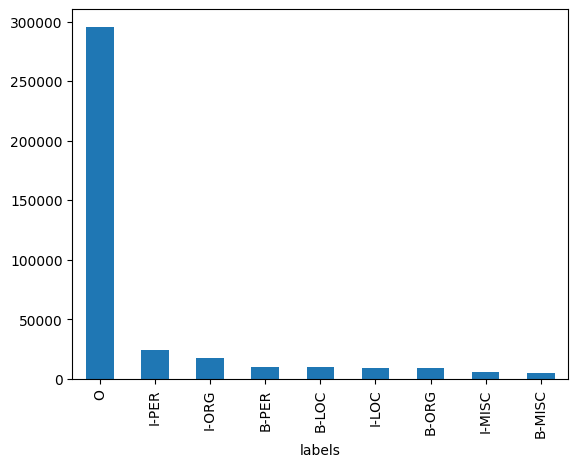

In [ ]:
transformed_label.groupby('labels').size().sort_values(ascending=False)[1:].plot(kind='bar')

In [ ]:
tokens_df.groupby('tokens').size().sort_values(ascending=False)

tokens
[PAD]          2816521
[SEP]            18726
[CLS]            18726
.                17614
,                11739
                ...   
##rated              1
programming          1
programs             1
credits              1
contestant           1
Length: 16340, dtype: int64

In [ ]:
top_30 = tokens_df.groupby('tokens').size().sort_values(ascending=False)[30:71]

<Axes: xlabel='tokens'>

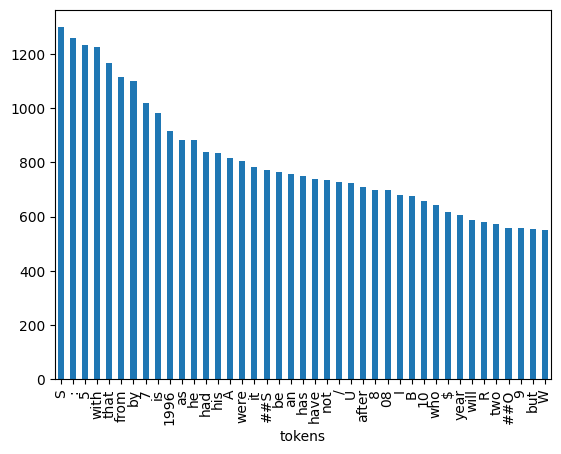

In [ ]:
top_30.plot(kind='bar')

In [ ]:
#tokenized_df = pd.DataFrame({'tokens': tokenized_datasets['data']tokens, 'labels': tokenized_datasets['data']['labels']})
#tokenized_df
#pd.DataFrame({'input_ids': tokenized_datasets['data']['input_ids'], 'token_type_ids': tokenized_datasets['data']['token_type_ids'], 'attention_mask': tokenized_datasets['data']['attention_mask'], 'labels': tokenized_datasets['data']['labels']})